<center><h1>Custom-MLP</h1></center>
<center><h3>Implementing a Multi-Layer Perceptron (MLP) from scratch</h3></center>
<center><h4><i>NumPy is all you need</i></h4></center>

<br/>

## Imports

In [1]:
from utils import (
    set_global_datatype,
    print_confusion_matrix
)

from mnist_dataset import (
    load_raw_MNIST_dataset_from_disk,
    plot_random_images_from_raw_MNIST_dataset,
    format_raw_MNIST_dataset
)

from network import Network

from layers import (
    InputLayer,
    DenseLayer,
    ActivationLayer,
    BatchNormLayer,
    DropoutLayer
)

<br/>

## Defining the datatype of *all* the data that will flow through the network

For now, the only accepted datatypes are `float32` (default) and `float64` :

In [2]:
# = "float32" (default) or "float64"
datatype = "float32"

set_global_datatype(datatype)

<br/>

## Variables that need to be manually defined (because they depend on the used dataset)

In [3]:
# These variables are only related to the `Network.display_some_predictions`
# method, called at the very end of this notebook

samples_are_images = True

if samples_are_images:
    # Format : (height, width), (height, width, 1) or (height, width, 3)
    #          (or `None` if the images are square-shaped, i.e. if their
    #          shape is either NxN, NxNx1 or NxNx3)
    default_image_shape = None

<br/>

## Optional variables

Here, `selected_classes` can either be :
- The string `"all"`, if you want to work with all the classes (default)
- A list/tuple/1D-array containing the specific class indices you want to work with (e.g. `[2, 4, 7]`). Note that, for the MNIST data, the class indices are <ins>equivalent</ins> to the digits themselves

In [4]:
selected_classes = "all"

If not set to `None`, `dict_of_real_class_names` is a dictionary with :
- As its keys   : **all** the selected class indices (as integers)
- As its values : the **real** names of the associated classes (as strings)

For instance, if you set `selected_classes` to `[2, 4, 7]`, then you could, for instance, set `dict_of_real_class_names` to the following dictionary :
`dict_of_real_class_names = {`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`2 : "TWO",`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`4 : "FOUR",`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`7 : "SEVEN"`<br>
`}`

By default, if `dict_of_real_class_names` is set to `None`, then the class names will simply be the string representations of the selected class indices :

In [5]:
dict_of_real_class_names = None

</br>

## Loading and formatting the data

The following seed is currently used to :
- Randomly split the raw data into the "train/test" or "train/val/test" sets
- Randomly shuffle the "train/test" or "train/val/test" sets

Set this seed to `None` for "real" randomness during those 2 processes :

In [6]:
seed_data_formatting = 555

Defining the number of samples in the "train/test" or "train/val/test" sets<br>
**<ins>NB</ins>** : The validation set is extracted from the raw "train" data, not from the raw "test" data. As a reminder, for the MNIST dataset, there are :
- 60000 samples in the raw "train" data **(if all the classes are selected)**
- 10000 samples in the raw "test" data **(if all the classes are selected)**

In [7]:
nb_train_samples = 10000
nb_val_samples   = 1000 # can be set to zero if needed
nb_test_samples  = 1000

Loading the raw data :

In [8]:
raw_X_train, raw_y_train, raw_X_test, raw_y_test = load_raw_MNIST_dataset_from_disk(
    verbose=True
)


Shapes of the raw MNIST data :
    - X_train : (60000, 28, 28)
    - y_train : (60000,)
    - X_test  : (10000, 28, 28)
    - y_test  : (10000,)

Types of the raw MNIST data :
    - X_train : numpy.uint8
    - y_train : numpy.uint8
    - X_test  : numpy.uint8
    - y_test  : numpy.uint8

Ranges of the raw MNIST data :
    - X_train : 0 -> 255
    - y_train : 0 -> 9
    - X_test  : 0 -> 255
    - y_test  : 0 -> 9

Distribution of the class indices :

y_train :
    0 --> 09.87 %
    1 --> 11.24 %
    2 --> 09.93 %
    3 --> 10.22 %
    4 --> 09.74 %
    5 --> 09.04 %
    6 --> 09.86 %
    7 --> 10.44 %
    8 --> 09.75 %
    9 --> 09.91 %
y_test :
    0 --> 09.80 %
    1 --> 11.35 %
    2 --> 10.32 %
    3 --> 10.10 %
    4 --> 09.82 %
    5 --> 08.92 %
    6 --> 09.58 %
    7 --> 10.28 %
    8 --> 09.74 %
    9 --> 10.09 %

The raw MNIST dataset was successfully loaded from the disk. Done in 0.328 seconds


Plotting random samples of each digit (from the raw data) :

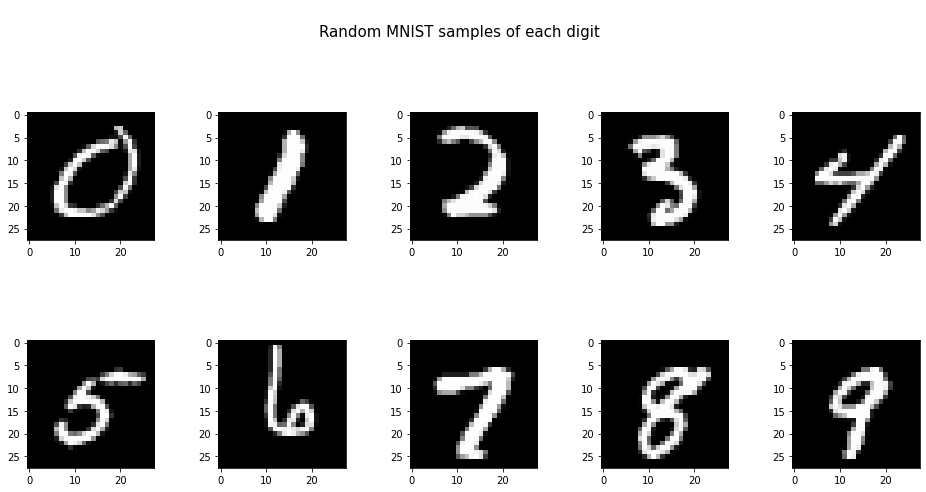

In [9]:
plot_random_images_from_raw_MNIST_dataset(
    raw_X_train,
    raw_y_train,
    raw_X_test,
    raw_y_test,
    seed=None
)

Formatting the raw data :

In [10]:
# NB : If you set `nb_val_samples` to zero, `X_val` and `y_val` will both
#      be equal to `None`
X_train, y_train, X_val, y_val, X_test, y_test = format_raw_MNIST_dataset(
    raw_X_train,
    raw_y_train,
    raw_X_test,
    raw_y_test,
    nb_train_samples,
    nb_val_samples,
    nb_test_samples,
    selected_classes=selected_classes,
    dict_of_real_class_names=dict_of_real_class_names,
    nb_shuffles=20,
    seed=seed_data_formatting,
    verbose=True
)


Shapes of the formatted MNIST data :
    - X_train : (10000, 784)
    - y_train : (10000, 10)
    - X_val   : (1000, 784)
    - y_val   : (1000, 10)
    - X_test  : (1000, 784)
    - y_test  : (1000, 10)

Types of the formatted MNIST data :
    - X_train : numpy.float32
    - y_train : numpy.float32
    - X_val   : numpy.float32
    - y_val   : numpy.float32
    - X_test  : numpy.float32
    - y_test  : numpy.float32

Ranges of the formatted MNIST data :
    - X_train : 0.000 -> 1.000 (mean=0.131, std=0.308)
    - y_train : 0.000 -> 1.000 (one-hot encoded)
    - X_val   : 0.000 -> 1.000 (mean=0.130, std=0.308)
    - y_val   : 0.000 -> 1.000 (one-hot encoded)
    - X_test  : 0.000 -> 1.000 (mean=0.132, std=0.310)
    - y_test  : 0.000 -> 1.000 (one-hot encoded)

Distribution of the class indices :

y_train :
    0 --> 09.87 %
    1 --> 11.24 %
    2 --> 09.93 %
    3 --> 10.22 %
    4 --> 09.74 %
    5 --> 09.03 %
    6 --> 09.86 %
    7 --> 10.44 %
    8 --> 09.75 %
    9 --> 09.92 %


</br>

## Checking the formatted data

**<ins>NB</ins>** : Assuming your data meets all the conditons described in the `README`, you don't need to change anything in this section

In [11]:
# Checking the validity of `X_train`, `y_train`, `X_test` and `y_test`,
# and returning their "corrected" counterparts

try:
    X_train, y_train, _ = Network._validate_data(X_train, y_train)
    X_test,  y_test,  _ = Network._validate_data(X_test,  y_test)
    
    assert X_train.shape[1] == X_test.shape[1], "X_train and X_test don't have the same number of features per sample !"
    assert y_train.shape[1] == y_test.shape[1], "y_train and y_test don't have the same number of classes !"
except (UnboundLocalError, NameError):
    raise Exception("Some training and/or testing data is not defined !")

In [12]:
# Checking the validity of `X_val` and `y_val` (if they exist, and are both
# not equal to `None`), and returning their "corrected" counterparts

try:
    if (X_val is not None) and (y_val is not None):
        X_val, y_val, _ = Network._validate_data(X_val, y_val)
        
        assert X_train.shape[1] == X_val.shape[1], "X_train and X_val don't have the same number of features per sample !"
        assert y_train.shape[1] == y_val.shape[1], "y_train and y_val don't have the same number of classes !"
    else:
        X_val, y_val = None, None
except (UnboundLocalError, NameError):
    # Here, it simply means that the validation data is not defined (which
    # isn't a problem, since it's optional)
    X_val, y_val = None, None

assert ("X_val" in locals()) and ("y_val" in locals())

</br>

## Defining the input and output sizes of the network (respectively)

In [13]:
# Input size = `nb_features_per_sample`
nb_features_per_sample = X_train.shape[1]

nb_features_per_sample

784

In [14]:
# Output size = `nb_classes` = number of (distinct) selected class indices
nb_classes = y_train.shape[1]

nb_classes

10

<br/>

## Defining the hyperparameters of the Multi-Layer Perceptron (MLP) network

The following seed is currently used to :<br>
- Randomly initialize the weights and biases of the Dense layers
- Randomly generate the dropout matrices of the Dropout layers (if these layers are used)
- Randomly split the training data into batches during the training phase (at each epoch)

Set this seed to `None` for "real" randomness during those 3 processes :

In [15]:
seed_network = 7777

**<ins>Main hyperparameters</ins> :**

In [16]:
# Number of times the trainable parameters will be updated using the WHOLE
# training data
nb_epochs = 10

# If you lower the batch size, you might also want to lower the learning
# rate (to prevent the network from overfitting)
train_batch_size = 40

# The learning rate has to lie in the range ]0, 1[
learning_rate = 0.15

# In chronological order
nb_neurons_in_hidden_dense_layers = [
    256,
    64,
    32
]

# Relevant choices here : "ReLU", "leaky_ReLU" or "tanh". The main
# activation name is case insensitive
main_activation_name = "ReLU"

if main_activation_name.strip().lower() == "leaky_relu":
    # Defining the "leaky ReLU coefficient" (default value : 0.01). It has
    # to lie in the range ]0, 1[
    activation_kwargs = {
        "leaky_ReLU_coeff" : 0.01
    }
else:
    activation_kwargs = {}

# Relevant choices here : "softmax" or "sigmoid". The output activation
# name is case insensitive
output_activation_name = "softmax"

The BatchNorm layer is a regularization layer that helps prevent overfitting (without necessarily improving the overall accuracy of the network). It basically standardizes (i.e. it normalizes with a mean of 0 and a standard deviation of 1) the outputs of the previous layer, and then applies an affine transform to the standardized outputs. The 2 parameters of the affine transform (typically called `gamma` and `beta`) are the trainable parameters of the layer :

In [17]:
use_batch_norm_layers = False

Just like the BatchNorm layer, the Dropout layer is a regularization layer that helps prevent overfitting, without necessarily improving the overall accuracy of the network. Basically, it randomly sets input values to 0 with a frequency of `dropout_rate` at each step during the training phase. This layer doesn't have any trainable parameters :

In [18]:
use_dropout_layers = False
dropout_rate = 0.30 # has to lie in the range ]0, 1[

<br/>

## Building the MLP network architecture from the previously defined hyperparameters

### Initializing the network

If you set the `standardize_input_data` kwarg to `True`, the training, validation AND testing sets will be normalized such that their mean is 0 and their standard deviation is 1 (i.e. they will be standardized). It's HIGHLY recommended to set `normalize_input_data` to `True` here, in order to obtain better results :

In [19]:
network = Network(standardize_input_data=True)

Input layer :

In [20]:
network.add(InputLayer(input_size=nb_features_per_sample))

### Hidden layers

In [21]:
seed = seed_network

for hidden_layer_index, nb_neurons in enumerate(nb_neurons_in_hidden_dense_layers):
    network.add(DenseLayer(nb_neurons, seed=seed))
    
    if use_batch_norm_layers:
        # Adding a BatchNorm regularization layer (if requested)
        network.add(BatchNormLayer())
    
    network.add(ActivationLayer(main_activation_name, **activation_kwargs))
    
    if use_dropout_layers:
        # Adding a Dropout regularization layer (if requested)
        network.add(DropoutLayer(dropout_rate, seed=seed))
    
    if seed is not None:
        # updating the seed such that the "randomness" in the added
        # Dense/Dropout layers is different each time (in case 2
        # consecutive values of `nb_neurons` are the same)
        seed += 1

### Output layers

In [22]:
if seed_network is not None:
    assert seed == seed_network + len(nb_neurons_in_hidden_dense_layers)

network.add(DenseLayer(nb_classes, seed=seed))
network.add(ActivationLayer(output_activation_name))

### Displaying the summary of the network's architecture

In [23]:
# NB : The kwargs of this method will only affect how the summary will look
#      like when it's printed (they won't affect the summary's contents)
network.summary(
    column_separator="|",        # can be multiple characters long
    row_separator="-",           # has to be a single character
    bounding_box="*",            # has to be a single character
    alignment="left",            # = "left" (default), "right" or "center"
    transition_row_style="full", # = "full" (default) or "partial"
    column_spacing=2,
    horizontal_spacing=4,
    vertical_spacing=1,
    offset_spacing=1
)

# Or, equivalently, you can run `network.summary()` or `print(network)`


 ***********************************************************************************************
 *                                                                                             *
 *                                       NETWORK SUMMARY                                       *
 *                                                                                             *
 *    |  Layer                  |  Input shape  |  Output shape  |  Trainable parameters  |    *
 *    |-------------------------|---------------|----------------|------------------------|    *
 *    |  Input(784)             |  (None, 784)  |  (None, 784)   |  0                     |    *
 *    |  Dense(256)             |  (None, 784)  |  (None, 256)   |  200,960               |    *
 *    |  Activation("relu")     |  (None, 256)  |  (None, 256)   |  0                     |    *
 *    |  Dense(64)              |  (None, 256)  |  (None, 64)    |  16,448                |    *
 *    |  Activation("relu")  

</br>

## Setting the loss function of the network

In [24]:
# Relevant choices here : "CCE" (Categorical Cross-Entropy) or "MSE" (Mean
# Squared Error). The loss function name is case insensitive
loss_function_name = "CCE"

network.set_loss_function(loss_function_name)

<br/>

## Training phase

**<ins>NB</ins>** : Here, inputting validation data is **optional**. If you don't want to use validation data, please (at least) set the `validation_data` kwarg to `None` (or don't specify it at all) :

In [25]:
if (X_val is not None) and (y_val is not None):
    validation_kwargs = {
        "validation_data" : (X_val, y_val), # can be set to `None` if needed
        "val_batch_size"  : 32              # default value
    }
else:
    validation_kwargs = {}

# If you set the `enable_checks` kwarg to `False` (to speed up the training),
# please first make sure your network runs a couple of epochs without errors
# when the same kwarg is set to `True`. This comment is only relevant to
# whoever wants to change some features of the project (or add some more !)

network.fit(
    X_train,
    y_train,
    nb_epochs,
    train_batch_size,
    learning_rate,
    nb_shuffles_before_each_train_batch_split=10,
    seed_train_batch_splits=seed_network,
    **validation_kwargs,
    enable_checks=True
)


# ------------------------------------------------------------------------------------------------------------- #

     Starting the training loop ...

     epoch 01/10  -  train_loss=0.7570  -  val_loss=0.3366  -  train_accuracy=0.7769  -  val_accuracy=0.9040                                          
     epoch 02/10  -  train_loss=0.2779  -  val_loss=0.2370  -  train_accuracy=0.9193  -  val_accuracy=0.9310                                          
     epoch 03/10  -  train_loss=0.1939  -  val_loss=0.2134  -  train_accuracy=0.9505  -  val_accuracy=0.9410                                          
     epoch 04/10  -  train_loss=0.1506  -  val_loss=0.1898  -  train_accuracy=0.9638  -  val_accuracy=0.9450                                          
     epoch 05/10  -  train_loss=0.1182  -  val_loss=0.1681  -  train_accuracy=0.9711  -  val_accuracy=0.9510                                          
     epoch 06/10  -  train_loss=0.0963  -  val_loss=0.1524  -  train_accuracy=0.9793  -  val

<br/>

## RESULTS

Plotting the network's history :

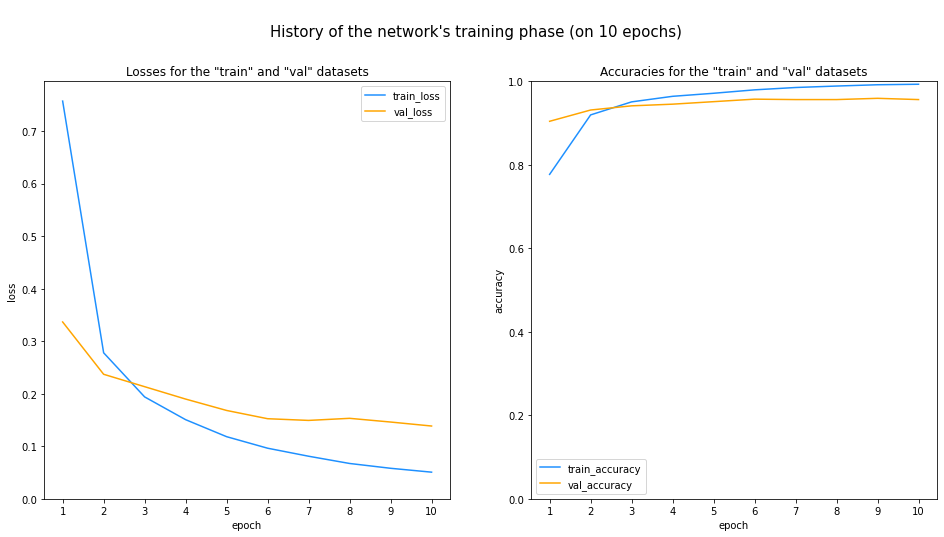

In [26]:
# If the plot is saved, it will be saved as a PNG image (by default)
network.plot_history(
    save_plot_to_disk=False,
    saved_image_name="network_history"
)

Computing the global accuracy scores, the testing loss and the (raw) confusion matrix of the network :

In [27]:
# The "top-N accuracy" is defined as the proportion of the true classes
# that lie within the `N` most probable predicted classes (here, `N` is
# actually `top_N_accuracy`)
top_N_accuracy = 2

acc_score, top_N_acc_score, test_loss, conf_matrix = network.evaluate(
    X_test,
    y_test,
    top_N_accuracy=top_N_accuracy,
    test_batch_size=32 # default value
)

Displaying the **<ins>confusion matrices</ins>** of the network :

In [28]:
# NB : When you load this notebook for the first time, the confusion matrices won't
#      be highlighted in the specified color (the outputs will be the unstyled confusion
#      matrices). Simply re-run the entire notebook to see their highlighting !

for normalize in ["no", "columns", "rows"]:
    print_confusion_matrix(
        conf_matrix,
        selected_classes=selected_classes,
        dict_of_real_class_names=dict_of_real_class_names,
        normalize=normalize, # = "columns" (default), "rows" or "no"
        precision=1,
        color="green" # = "green" (default), "blue", "purple", "red" or "orange"
    )


RAW CONFUSION MATRIX (normalized="no") :


PREDICTED,0,1,2,3,4,5,6,7,8,9
ACTUAL,,,,,,,,,,
0,96,1,0,0,0,0,0,0,0,1
1,0,113,0,0,0,0,1,0,0,0
2,1,1,99,0,0,0,0,1,0,1
3,0,0,1,93,0,3,0,2,0,2
4,0,0,2,0,92,0,1,0,0,3
5,0,0,0,1,0,85,1,0,1,1
6,0,0,0,0,0,0,96,0,0,0
7,1,0,1,0,0,0,0,99,0,2
8,2,0,0,1,0,0,2,3,89,0



NETWORK PRECISION - NORMALIZED CONFUSION MATRIX (normalized="columns") :


PREDICTED,0,1,2,3,4,5,6,7,8,9
ACTUAL,,,,,,,,,,
0,96.0 %,0.9 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.9 %
1,0.0 %,97.4 %,0.0 %,0.0 %,0.0 %,0.0 %,1.0 %,0.0 %,0.0 %,0.0 %
2,1.0 %,0.9 %,95.2 %,0.0 %,0.0 %,0.0 %,0.0 %,1.0 %,0.0 %,0.9 %
3,0.0 %,0.0 %,1.0 %,97.9 %,0.0 %,3.4 %,0.0 %,1.9 %,0.0 %,1.9 %
4,0.0 %,0.0 %,1.9 %,0.0 %,100.0 %,0.0 %,1.0 %,0.0 %,0.0 %,2.8 %
5,0.0 %,0.0 %,0.0 %,1.1 %,0.0 %,96.6 %,1.0 %,0.0 %,1.1 %,0.9 %
6,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,94.1 %,0.0 %,0.0 %,0.0 %
7,1.0 %,0.0 %,1.0 %,0.0 %,0.0 %,0.0 %,0.0 %,94.3 %,0.0 %,1.9 %
8,2.0 %,0.0 %,0.0 %,1.1 %,0.0 %,0.0 %,2.0 %,2.9 %,98.9 %,0.0 %



NETWORK RECALL - NORMALIZED CONFUSION MATRIX (normalized="rows") :


PREDICTED,0,1,2,3,4,5,6,7,8,9
ACTUAL,,,,,,,,,,
0,98.0 %,1.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,1.0 %
1,0.0 %,99.1 %,0.0 %,0.0 %,0.0 %,0.0 %,0.9 %,0.0 %,0.0 %,0.0 %
2,1.0 %,1.0 %,96.1 %,0.0 %,0.0 %,0.0 %,0.0 %,1.0 %,0.0 %,1.0 %
3,0.0 %,0.0 %,1.0 %,92.1 %,0.0 %,3.0 %,0.0 %,2.0 %,0.0 %,2.0 %
4,0.0 %,0.0 %,2.0 %,0.0 %,93.9 %,0.0 %,1.0 %,0.0 %,0.0 %,3.1 %
5,0.0 %,0.0 %,0.0 %,1.1 %,0.0 %,95.5 %,1.1 %,0.0 %,1.1 %,1.1 %
6,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,100.0 %,0.0 %,0.0 %,0.0 %
7,1.0 %,0.0 %,1.0 %,0.0 %,0.0 %,0.0 %,0.0 %,96.1 %,0.0 %,1.9 %
8,2.1 %,0.0 %,0.0 %,1.0 %,0.0 %,0.0 %,2.1 %,3.1 %,91.8 %,0.0 %


Displaying the **<ins>testing loss</ins>** and the **<ins>global accuracy scores</ins>** of the network :

In [29]:
precision_loss = 4 # by default
print(f"\nTESTING LOSS    : {test_loss:.{precision_loss}f}")

precision_accuracy = 2 # by default
print(f"\nGLOBAL ACCURACY : {acc_score:.{precision_accuracy}f} %")
potential_extra_space = " " * int(top_N_accuracy < 10)
print(f"TOP-{top_N_accuracy}{potential_extra_space} ACCURACY : {top_N_acc_score:.{precision_accuracy}f} %\n")


TESTING LOSS    : 0.1417

GLOBAL ACCURACY : 96.00 %
TOP-2  ACCURACY : 98.40 %



Displaying some of the network's predictions **(assuming the rows of `X_test` are the flattened versions of <ins>images</ins>)** :

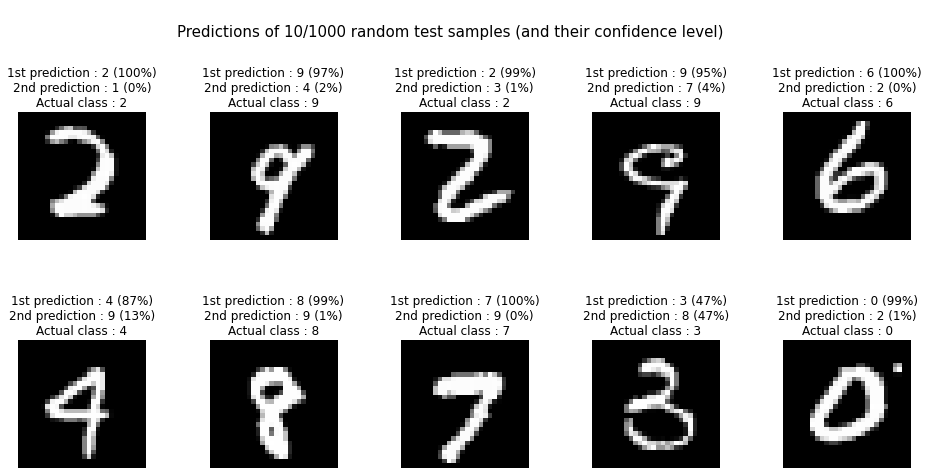

In [30]:
if samples_are_images:
    network.display_some_predictions(
        X_test,
        y_test,
        selected_classes=selected_classes,
        dict_of_real_class_names=dict_of_real_class_names,
        image_shape=default_image_shape,
        seed=None
    )

<br/>

<center><h2>END</h2></center>